<a href="https://colab.research.google.com/github/avillamil92/ProyectoFinal_PasajerosAereosMDE.github.io/blob/gh-pages/VILLAMIL_VALLEJO_ANDRES_ProyectoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MINTIC – TALENTO TECH | ANALISIS Y VISUALIZACIÓN DE DATOS**


---



**PROYECTO FINAL**

Pasajeros aereos salidas y llegadas internacionales del aeropuerto de Medellín




###1. Instalación

In [1]:
!pip install mysql-connector-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 22.7 MB/s eta 0:00:00


In [2]:
!pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [3]:
pip install folium

###2. Importación de librarias

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import mysql.connector as my

In [5]:
import folium

###3. Carga de datos desde URL de GitHub

In [6]:
# Leer los datos desde la URL desplegada con GitHub con pandas

url = 'https://raw.githubusercontent.com/avillamil92/ProyectoFinal_PasajerosAereosMDE.github.io/gh-pages/datos_combinados.csv'

df = pd.read_csv(url)
df.head()

,cod,sal_destinoint,sal_indicador,sal_periodo,sal_valor,ano,mes,lle_indicador,lle_origenpax,lle_periodo,lle_valor,total_pax,latitud,longitud
0,KR,Corea del Sur,SALIDA_PAX,202209,1,2022,9,LLEGADA_PAX_INTERNA,Corea del Sur,202209,3,4,36.638392,127.696119
1,BB,Barbados,SALIDA_PAX,202209,1,2022,9,LLEGADA_PAX_INTERNA,Barbados,202209,2,3,13.150033,-59.525030
2,IL,Israel,SALIDA_PAX,202209,23,2022,9,LLEGADA_PAX_INTERNA,Israel,202209,48,71,30.812425,34.859476
3,KY,Islas Caimán,SALIDA_PAX,202209,1,2022,9,LLEGADA_PAX_INTERNA,Islas Caimán,202209,3,4,19.703182,-79.917463
4,CA,Canadá,SALIDA_PAX,202209,740,2022,9,LLEGADA_PAX_INTERNA,Canadá,202209,343,1083,61.066692,-107.991707


###4. Exploración de los datos del DF

In [7]:
# Verificamos los tipos de datos

print(df.dtypes)

cod                object
sal_destinoint     object
sal_indicador      object
sal_periodo         int64
sal_valor           int64
ano                 int64
mes                 int64
lle_indicador      object
lle_origenpax      object
lle_periodo         int64
lle_valor           int64
total_pax           int64
latitud           float64
longitud          float64
dtype: object


In [8]:
# Contamos el número de registros (filas) en el DataFrame

num_registros = df.shape[0]
print(f"El número de registros en el dataset es: {num_registros}")

El número de registros en el dataset es: 5869


In [9]:
# Verificamos si hay valores nulos

print(df.isnull().sum())

cod               0
sal_destinoint    0
sal_indicador     0
sal_periodo       0
sal_valor         0
ano               0
mes               0
lle_indicador     0
lle_origenpax     0
lle_periodo       0
lle_valor         0
total_pax         0
latitud           0
longitud          0
dtype: int64


In [10]:
# Contamos si hay valores duplicados en el DataFrame completo

print(df.duplicated().sum())

0


In [11]:
# Obtener la lista de países únicos y ordenarla
paises_unicos = sorted(pd.unique(df['sal_destinoint']))

# Imprimir la lista de países únicos
print("Lista de países únicos:", paises_unicos)

# Imprimir el número de países únicos
print("Número de países únicos:", len(paises_unicos))

Lista de países únicos: ['Alemania', 'Antigua and barbuda', 'Antillas Neerlandesas', 'Argentina', 'Australia', 'Austria', 'Bahamas', 'Barbados', 'Belice', 'Bermudas', 'Bolivia', 'Brasil', 'Bélgica', 'CROACIA', 'Canadá', 'Chile', 'China', 'Colombia', 'Corea del Sur', 'Costa Rica', 'Cuba', 'Dinamarca', 'Dominica', 'Ecuador', 'El Salvador', 'Emiratos Árabes Unidos', 'España', 'Estados Unidos', 'Filipinas', 'Francia', 'Grecia', 'Guatemala', 'Guyana', 'Haiti', 'Honduras', 'Irlanda', 'Islas Caimán', 'Israel', 'Italia', 'Jamaica', 'Japón', 'Jordania', 'Líbano', 'Marruecos', 'México', 'Nicaragua', 'Noruega', 'Nueva Zelanda', 'Panamá', 'Paraguay', 'Países Bajos', 'Perú', 'Portugal', 'Puerto Rico', 'Qatar', 'Reino Unido', 'República Dominicana', 'Rumania', 'Rusia', 'San Cristóbal y Nieves', 'Santa Lucia', 'Senegal', 'Sudáfrica', 'Suecia', 'Suiza', 'Surinam', 'Trinidad y Tobago', 'Turquía', 'Uruguay', 'Venezuela', 'india']
Número de países únicos: 71


###5. Análisis de los datos

In [12]:
# Valor de la suma completa del dataset combinado de pasajeros de salida, llegada y 'total_pax' de Medellín por año

suma_por_ano = df.groupby('ano')[['sal_valor','lle_valor','total_pax']].sum()
print(suma_por_ano)

      sal_valor  lle_valor  total_pax
ano                                  
2007     288161     277111     565272
2008     315532     289812     605344
2009     369658     364981     734639
2010     417919     404219     822138
2011     418826     403076     821902
2012     456509     452469     908978
2013     533848     528016    1061864
2014     594409     593706    1188115
2015     671639     675362    1347001
2016     781639     772988    1554627
2017     796001     781864    1577865
2018     900232     883654    1783886
2019     994788     973779    1968567
2020     296462     302696     599158
2021     793060     765225    1558285
2022    1392999    1306326    2699325
2023     249706     224207     473913


In [13]:
# Valor de la suma completa del dataset combinado de pasajeros de salida, llegada y 'total_pax' de Medellín por pais

suma_por_pais = df.groupby('lle_origenpax')[['sal_valor','lle_valor','total_pax']].sum()

# Se cambia la etiqueta 'lle_origenpax' por 'pais' por presentación
suma_por_pais = suma_por_pais.rename(columns={'lle_origenpax': 'país'})

print(suma_por_pais)

                       sal_valor  lle_valor  total_pax
lle_origenpax                                         
Alemania                   12181      12525      24706
Antillas Neerlandesas     155807     155027     310834
Argentina                 101342      95592     196934
Australia                   1148       1187       2335
Austria                      502        446        948
...                          ...        ...        ...
Turquía                       25         88        113
Uruguay                    11984      12734      24718
Venezuela                 241074     240911     481985
antigua and barbuda           15         29         44
india                         -4         -4         -8

[71 rows x 3 columns]


In [14]:
# Ordenar los datos según el número total de pasajeros ('total_pax') en orden descendente
suma_por_pais_orden = suma_por_pais.sort_values(by='total_pax', ascending=False)

print(suma_por_pais_orden.head(10))

                       sal_valor  lle_valor  total_pax
lle_origenpax                                         
Estados Unidos           3998789    3944880    7943669
Panamá                   2652481    2607040    5259521
México                    798639     751646    1550285
España                    671741     605431    1277172
Perú                      424368     445847     870215
República Dominicana      260874     269046     529920
Venezuela                 241074     240911     481985
Ecuador                   235904     214761     450665
Antillas Neerlandesas     155807     155027     310834
Brasil                    136473     128772     265245


**Conclusión:**

1. Entre 2007 y 2023, el país con máyor movimiento de pasajeros es Estados Unidos desde y hacia Medellín
2. Entre 2007 y 2023, los principales vuelos aeroportuarios desde/hacia Medellín corresponden a paises ubicados en norte america y america latina.

###6. Gráficas y visualización de datos

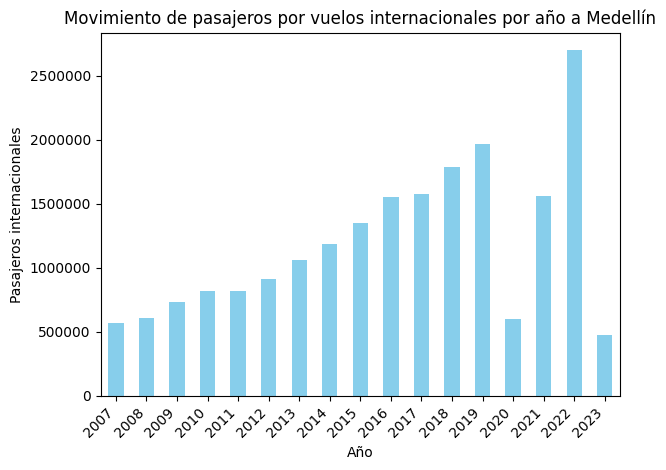

In [15]:
# Tendencia de pasajeros internacionales por año con la libreria Matplotlib

import matplotlib.pyplot as plt

llegadas_año = df.groupby('ano')['total_pax'].sum()
llegadas_año.plot(kind='bar', color='skyblue')
plt.title('Movimiento de pasajeros por vuelos internacionales por año a Medellín')
plt.xlabel('Año')
plt.ylabel('Pasajeros internacionales')

# Establecer el formato de las etiquetas del eje y en número normal
plt.ticklabel_format(style='plain', axis='y')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Conclusión:**

1. Entre 2007 y 2019, el número de pasajeros aumenta año tras año. Para 2020 y 2021 existe una reducción significativa debido a la emergencia sanitaria del Covid-19 que tuvo como consecuencia la cancelación de vuelos con origenes y/o destinos internacionales.
2. Es importante revisar la fuente de información de estos datos, puesto que para el 2022 se encuentran reportando un movimiento 27 millones de pasajeros internacionales, este valor esta fuera de contexto de acuerdo con la realidad del aeropuerto y de los movimientos de pasajeros internacionales a nivel nacional.

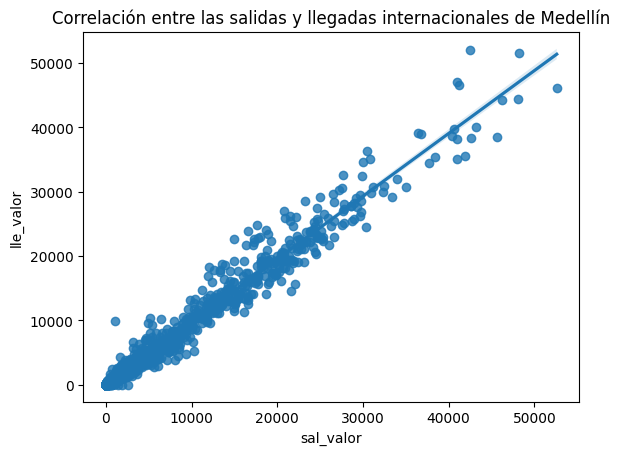

In [16]:
# Correlación de las salidas y llegadas con la libreria Seaborn

import seaborn as sns

from matplotlib import pyplot as plt

sns.regplot(x='sal_valor', y='lle_valor', data=df)
plt.title('Correlación entre las salidas y llegadas internacionales de Medellín')
plt.show()

**Conclusión:**

1. Se observa que para la mayoría de paises la cantidad de pasajeros de salida es ligeramente mayor que los pasajeros que llegan a Medellín. Se puede inferir que el movimiento de pasajeros internacionales que llegan es aproximadamente igual a los pasajeros internacionales que salen de Medellín.